In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [248]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## EDA

In [249]:
resume_data = pd.read_csv('UpdatedResumeDataSet.csv')

In [250]:
resume_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [251]:
resume_data.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [252]:
resume_data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


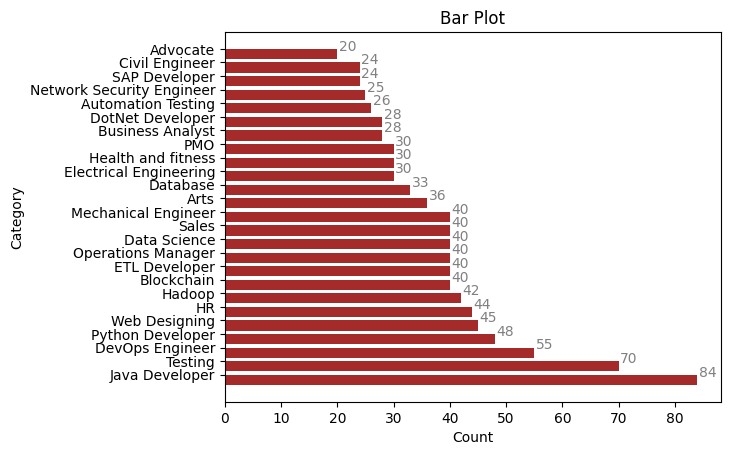

In [253]:
a = resume_data.Category.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="brown")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='grey')
plt.title('Bar Plot')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


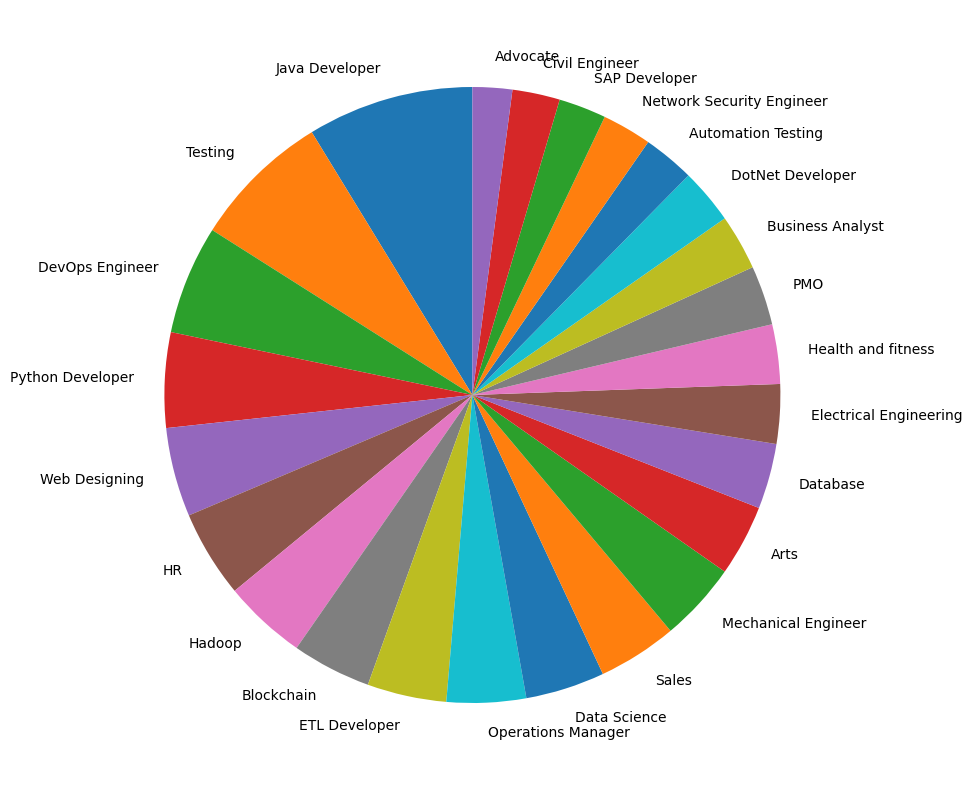

In [254]:
fig = plt.figure(figsize =(12, 10))
plt.pie(y, labels = x, startangle = 90)
plt.show()

Data Pre-processing

In [255]:
# # Code removing all S's and adding extra white spaces
# # Also replacing white w white space

# def cleanResume(resumeText):
#     resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
#     resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
#     resumeText = re.sub('#S+', ' ', resumeText)  # remove hashtags
#     resumeText = re.sub('@S+', ' ', resumeText)  # remove mentions
#     resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), '', resumeText)  # remove punctuations
#     resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)
#     resumeText = re.sub('s+', ' ', resumeText)  # remove extra whitespace
#     return resumeText

In [256]:
def cleanResume(resumeText):
    resumeText = re.sub(r'https?://\S+', ' ', resumeText)  # remove URLs
    resumeText = re.sub(r'RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub(r'#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r'@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^a-zA-Z0-9\s]', '', resumeText)  # remove non-alphanumeric characters except whitespace
    resumeText = re.sub(r'\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText.strip().lower()


In [257]:
resume_data['cleaned_resume'] = resume_data.Resume.apply(lambda x: cleanResume(x))

In [258]:
resume_data.head(3)

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...


Encode 'Category'

In [259]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_data['Category_encoded'] = le.fit_transform(resume_data[i])

In [260]:
resume_data["Category"].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [261]:
# resume_data.to_csv('resume_data_clean.csv', index=False)

In [265]:
resume_data

,Category,Resume,cleaned_resume,Category_encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...,23
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive t...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...,23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...,23


In [264]:
requiredText = resume_data['cleaned_resume']

In [266]:
requiredTarget = resume_data['Category_encoded']

In [294]:
X_train,X_test,y_train,y_test = train_test_split(requiredText,requiredTarget,random_state=0, 
                                                 test_size=0.5, stratify=requiredTarget)

In [295]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=100)

In [296]:
X_train_vector = word_vectorizer.fit_transform(X_train)
X_test_vector = word_vectorizer.transform(X_test)

## Word Vector Approach

In [270]:
test_list = requiredText.tolist()

In [271]:
import spacy
import pandas as pd
import numpy as np

# Load the English model with pre-trained word vectors
nlp = spacy.load('en_core_web_md')

def texts_to_vectors(text_list):
    text_vectors = []
    removed_indices = []
    for idx, text in enumerate(text_list):
        tokens = nlp(text)
        word_vectors = [token.vector for token in tokens if token.has_vector]
        if word_vectors:
            text_vector = np.mean(word_vectors, axis=0)
            text_vectors.append(text_vector)
        else:
            removed_indices.append(idx)
            print(f"Text at index {idx} removed: {text}")
    
    if len(removed_indices) > 0:
        print(f"Total texts removed: {len(removed_indices)}")
    
    return np.array(text_vectors), removed_indices

text_vector, removed_indices = texts_to_vectors(test_list)


In [272]:
# requiredTarget = requiredTarget.drop(656)
# target_arr = requiredTarget.to_numpy()

requiredTarget = resume_data['Category_encoded']
target_arr = requiredTarget.to_numpy()

In [291]:
X_train_wordvec, X_test_wordvec, y_train_wordvec, y_test_wordvec = train_test_split(
    text_vector, target_arr, random_state=0, test_size=0.5, stratify=target_arr)

## KNN Classifier

### TF-IDF

In [357]:
#KNN for multi-class classification
clf = KNeighborsClassifier()
clf.fit(X_train_vector, y_train)

prediction = clf.predict(X_test_vector)

In [358]:
print('Accuracy of KNeighbors Classifier on training set: {:.4f}'.format(clf.score(X_train_vector, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.4f}'.format(clf.score(X_test_vector, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.9127
Accuracy of KNeighbors Classifier on test set: 0.8212


### Word Vectors

In [299]:
#KNN for multi-class classification
clf = KNeighborsClassifier()
clf.fit(X_train_wordvec, y_train_wordvec)

prediction = clf.predict(X_test_wordvec)

In [353]:
print('Accuracy of KNeighbors Classifier on training set: {:.4f}'.format(clf.score(X_train_wordvec, y_train_wordvec)))
print('Accuracy of KNeighbors Classifier on test set: {:.4f}'.format(clf.score(X_test_wordvec, y_test_wordvec)))

Accuracy of KNeighbors Classifier on training set: 0.8773
Accuracy of KNeighbors Classifier on test set: 0.7318


## Logistic Regression

### TF-IDF

In [360]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', C=0.5)

logreg.fit(X_train_vector, y_train)
prediction = logreg.predict(X_test_vector)

In [361]:
print('Accuracy on training set: {:.4f}'.format(logreg.score(X_train_vector, y_train)))
print('Accuracy on test set: {:.4f}'.format(logreg.score(X_test_vector, y_test)))

Accuracy on training set: 0.8732
Accuracy on test set: 0.8233


### Word Vector

In [325]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', C=0.01)

logreg.fit(X_train_wordvec, y_train_wordvec)
prediction = logreg.predict(X_test_wordvec)

/Users/milindbhatia/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [354]:
print('Accuracy on training set: {:.4f}'.format(logreg.score(X_train_wordvec, y_train_wordvec)))
print('Accuracy on test set: {:.4f}'.format(logreg.score(X_test_wordvec, y_test_wordvec)))

Accuracy on training set: 0.8628
Accuracy on test set: 0.7879


## Random Forest

### TF-IDF

In [351]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000,  # Reduced number of trees
    max_depth=4,      # Limited maximum depth
    # min_samples_split=5,  # Increased min samples for split
    # min_samples_leaf=2,   # Increased min samples for leaf
    max_features='sqrt'   # Use square root of features for splitting
)

rf.fit(X_train_vector, y_train)
prediction = rf.predict(X_test_vector)

In [355]:
print('Accuracy on training set: {:.4f}'.format(rf.score(X_train_vector, y_train)))
print('Accuracy on test set: {:.4f}'.format(rf.score(X_test_vector, y_test)))

Accuracy on training set: 0.8919
Accuracy on test set: 0.8690


### Word Vector

In [345]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=1000,  # Reduced number of trees
    max_depth=4,      # Limited maximum depth
    # min_samples_split=5,  # Increased min samples for split
    # min_samples_leaf=2,   # Increased min samples for leaf
    max_features='sqrt'   # Use square root of features for splitting
)

rf.fit(X_train_wordvec, y_train_wordvec)
prediction = rf.predict(X_test_wordvec)

In [346]:
print('Accuracy on training set: {:.2f}'.format(rf.score(X_train_wordvec, y_train_wordvec)))
print('Accuracy on test set: {:.2f}'.format(rf.score(X_test_wordvec, y_test_wordvec)))

Accuracy of KNeighbors Classifier on training set: 0.93
Accuracy of KNeighbors Classifier on test set: 0.86


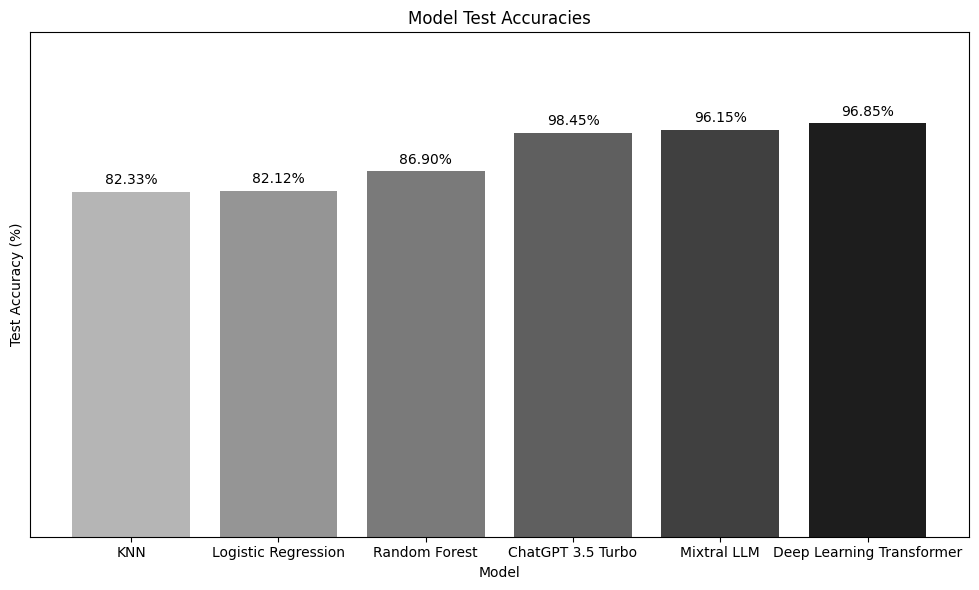

In [381]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Deep Learning Transformer', 'ChatGPT 3.5 Turbo', 'Mixtral LLM']
accuracies = [82.33, 82.12, 86.90, 98.45, 96.15, 96.85]

# Convert accuracies to percentages
accuracies_percent = [f'{acc:.2f}%' for acc in accuracies]

# Sort the accuracies and models together
sorted_accuracies, sorted_models = zip(*sorted(zip(accuracies, models)))

plt.figure(figsize=(10, 6))

# Generate a color palette for the bars
colors = plt.cm.Greys(np.linspace(0.4,0.9, len(models)))

bars = plt.bar(sorted_models, sorted_accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Test Accuracies')
plt.ylim(0, 120)  # Set y-axis limits to 0-100 for accuracy percentages

# Wrap x-axis labels
plt.xticks(rotation=0, ha='center', wrap=True)

# Add values on top of bars
for bar, value in zip(bars, accuracies_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, value, ha='center', va='bottom')

# Hide y-axis
plt.yticks([])
plt.tight_layout()
plt.show()
